<a href="https://colab.research.google.com/github/yongjulee0213/ale_python_interface/blob/master/sarcasm_tokenizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#sarasm dataset

In [46]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [74]:
#hyperparameters
training_size=20000
vocab_size=10000
embedding_dim=16
max_length=32
trunc_type='post'
padding_type='post'
oov_tok='<OOV>'

In [6]:
|!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-10-05 04:32:02--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2022-10-05 04:32:02 (155 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [24]:
#데이터 다운로드해서 열기
with open("/content/sarcasm.json",'r') as f:
  datastore=json.load(f)

sentences=[]
labels=[]

print(datastore)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [26]:
training_sentences=sentences[0:training_size]
testing_sentences=sentences[training_size:]
training_labels=labels[0:training_size]
testing_labels=labels[training_size:]

In [47]:
tokenizer=Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
training_sequences=tokenizer.texts_to_sequences(training_sentences)
word_index=tokenizer.word_index
training_padded=pad_sequences(training_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length,padding=padding_type, truncating=trunc_type)

#convert the lables lists into numpy array for valid data type for model.fit()
training_labels=np.array(training_labels)
testing_labels=np.array(testing_labels)

In [36]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 32, 16)            16000     
                                                                 
 global_average_pooling1d_4   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 24)                408       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 32, 16)            16000     
                                                                 
 global_average_pooling1d_4   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 24)                408       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


In [75]:
num_epochs = 30

# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.0838 - accuracy: 0.9692 - val_loss: 1.7808 - val_accuracy: 0.7776 - 969ms/epoch - 2ms/step
Epoch 2/30
625/625 - 1s - loss: 0.0850 - accuracy: 0.9687 - val_loss: 1.7489 - val_accuracy: 0.7776 - 805ms/epoch - 1ms/step
Epoch 3/30
625/625 - 1s - loss: 0.0836 - accuracy: 0.9686 - val_loss: 1.7476 - val_accuracy: 0.7755 - 769ms/epoch - 1ms/step
Epoch 4/30
625/625 - 1s - loss: 0.0832 - accuracy: 0.9692 - val_loss: 1.7822 - val_accuracy: 0.7734 - 766ms/epoch - 1ms/step
Epoch 5/30
625/625 - 1s - loss: 0.0832 - accuracy: 0.9696 - val_loss: 1.7992 - val_accuracy: 0.7749 - 920ms/epoch - 1ms/step
Epoch 6/30
625/625 - 1s - loss: 0.0824 - accuracy: 0.9699 - val_loss: 1.7751 - val_accuracy: 0.7734 - 782ms/epoch - 1ms/step
Epoch 7/30
625/625 - 1s - loss: 0.0822 - accuracy: 0.9693 - val_loss: 1.8072 - val_accuracy: 0.7719 - 912ms/epoch - 1ms/step
Epoch 8/30
625/625 - 1s - loss: 0.0820 - accuracy: 0.9689 - val_loss: 1.8093 - val_accuracy: 0.7769 - 739ms/epoch - 1ms/step


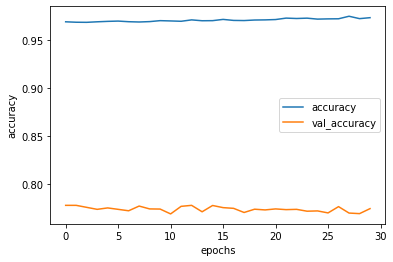

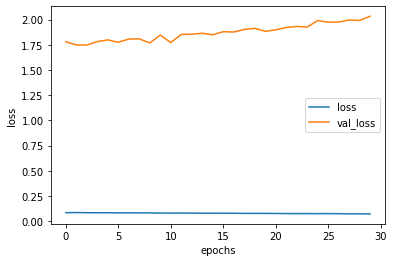

In [76]:
#plot the result
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')